# Pareto front

In [15]:
import matplotlib.pyplot as plt
from analysis import load_json, convert_rate
from analysis.aoi import plot_pareto

In [16]:
%matplotlib inline

## Payload 128B

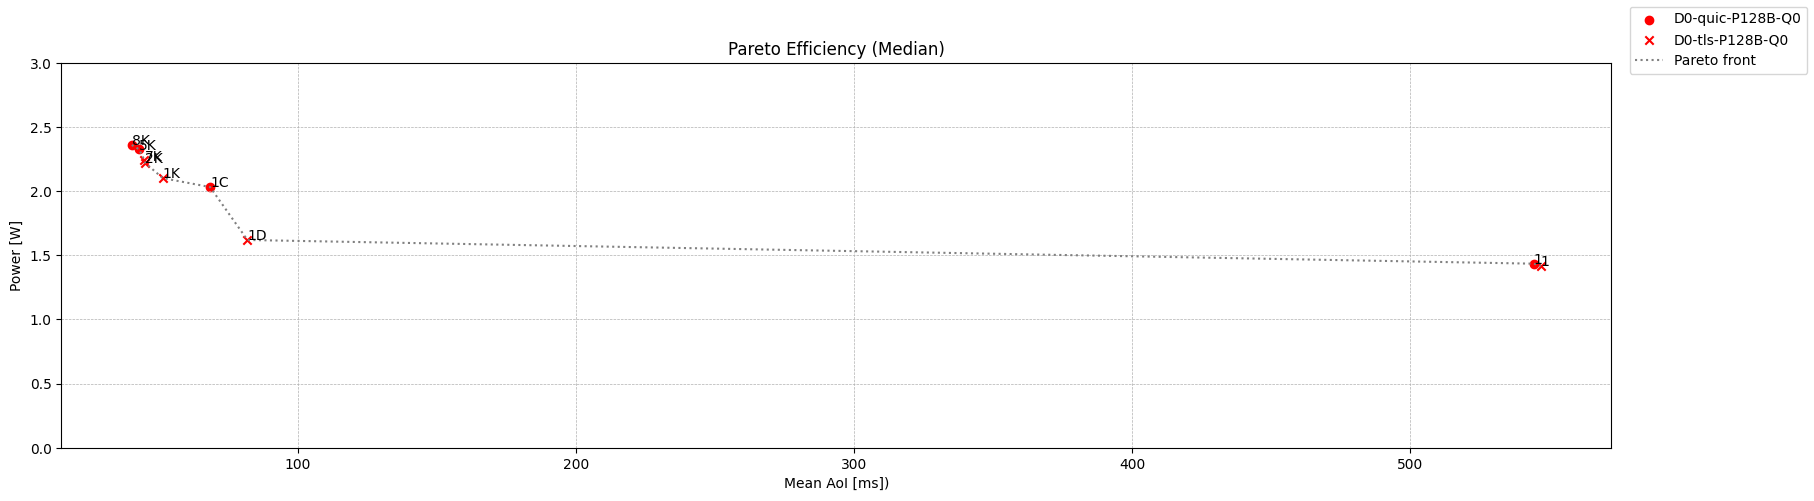

In [3]:
aoi_128B = load_json('../../../results/aoi/aoi_128B_D0.json')
del_keys = []
for key in aoi_128B.keys():
    for sub_key in aoi_128B[key].keys():
        if 'Q0' not in sub_key:
            del_keys.append((key, sub_key))

for key, sub_key in del_keys:
    del aoi_128B[key][sub_key]

front_128B = plot_pareto(aoi_128B['mean_aoi'], aoi_128B['median_aoi'], aoi_128B['energy'], aoi_128B['time'], metric='median')

## Payload 256B

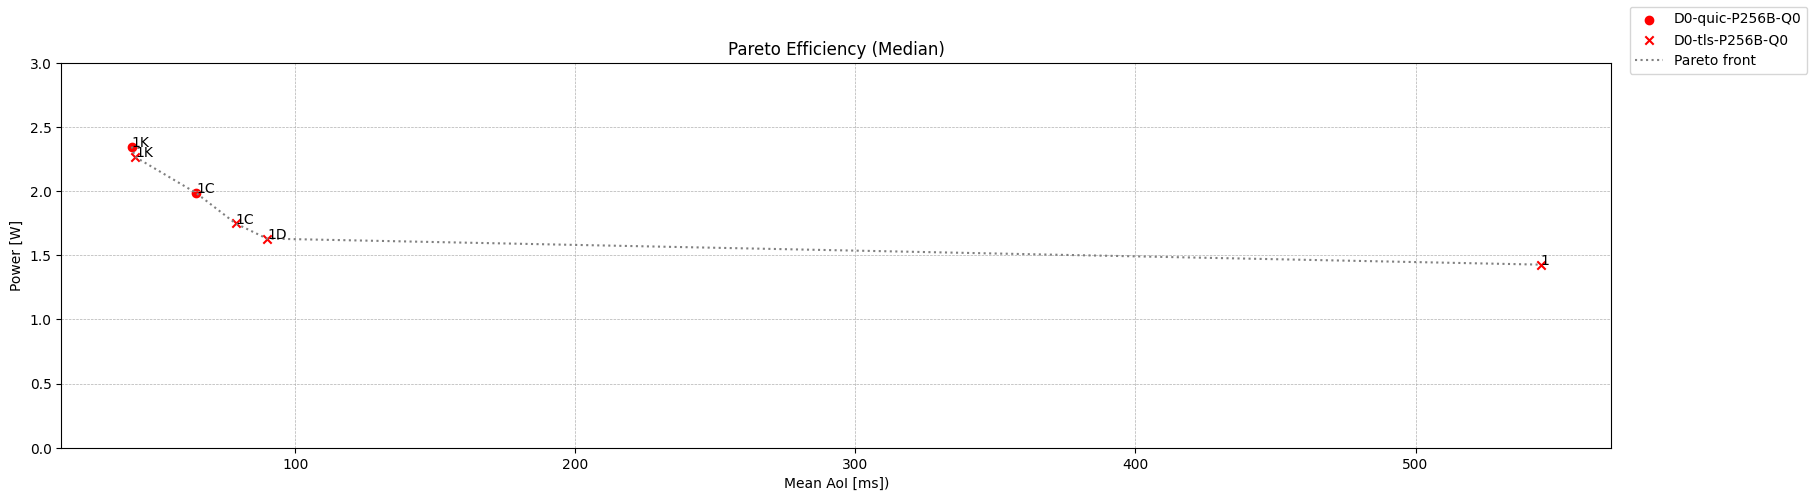

In [4]:
aoi_256B = load_json('../../../results/aoi/aoi_256B.json')

del_keys = []
for key in aoi_256B.keys():
    for sub_key in aoi_256B[key].keys():
        if 'Q0' not in sub_key:
            del_keys.append((key, sub_key))
for key, sub_key in del_keys:
    del aoi_256B[key][sub_key]

front_256B = plot_pareto(aoi_256B['mean_aoi'], aoi_256B['median_aoi'], aoi_256B['energy'], aoi_256B['time'], metric='median')

# 512B

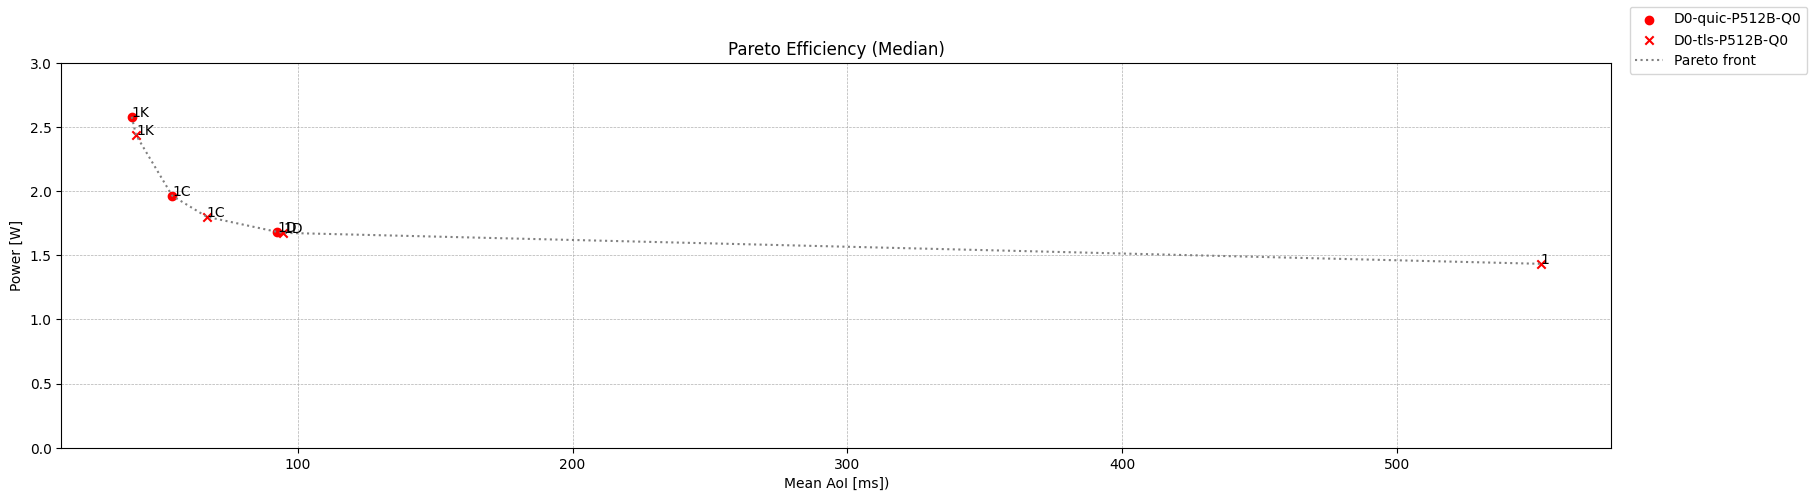

In [5]:
aoi_512B = load_json('../../../results/aoi/aoi_512B.json')

del_keys = []
for key in aoi_512B.keys():
    for sub_key in aoi_512B[key].keys():
        if 'Q0' not in sub_key:
            del_keys.append((key, sub_key))
for key, sub_key in del_keys:
    del aoi_512B[key][sub_key]

front_512B = plot_pareto(aoi_512B['mean_aoi'], aoi_512B['median_aoi'], aoi_512B['energy'], aoi_512B['time'], metric='median')

## Payload 1KB

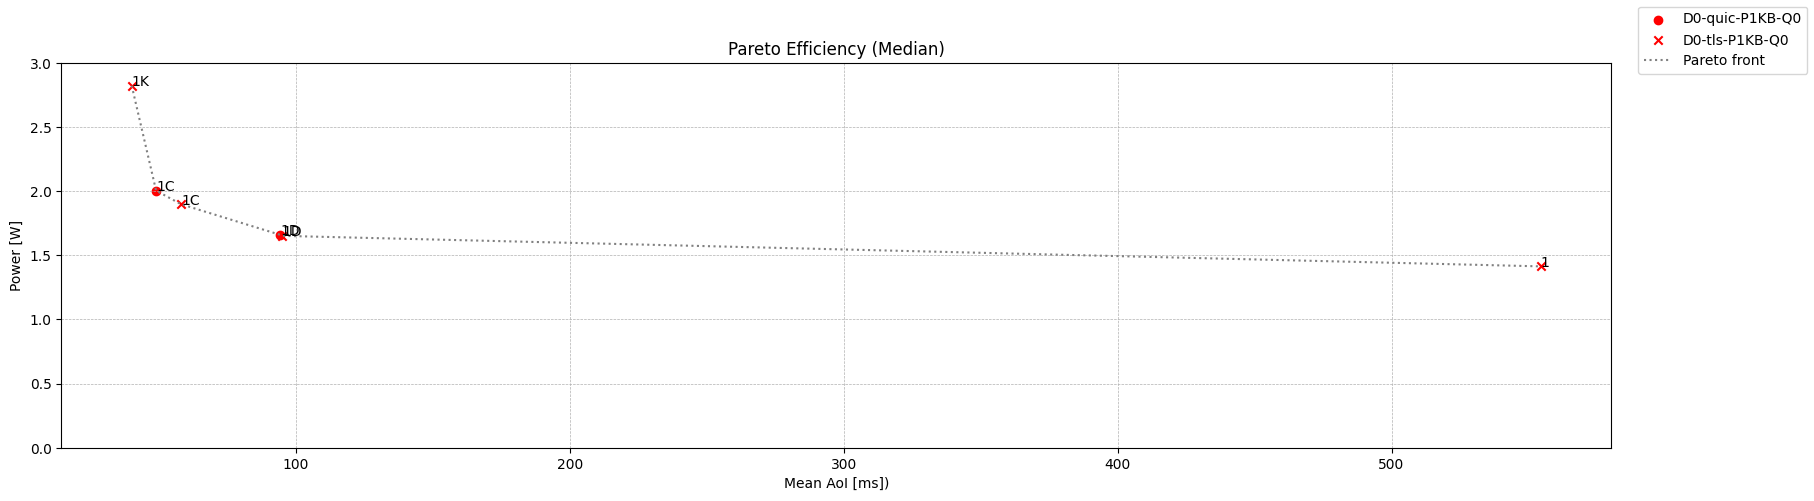

In [7]:
aoi_1KB = load_json('../../../results/aoi/aoi_1KB.json')

del_keys = []
for key in aoi_1KB.keys():
    for sub_key in aoi_1KB[key].keys():
        if 'Q0' not in sub_key:
            del_keys.append((key, sub_key))
for key, sub_key in del_keys:
    del aoi_1KB[key][sub_key]

front_1KB = plot_pareto(aoi_1KB['mean_aoi'], aoi_1KB['median_aoi'], aoi_1KB['energy'], aoi_1KB['time'], metric='median')

## Payload 2KB

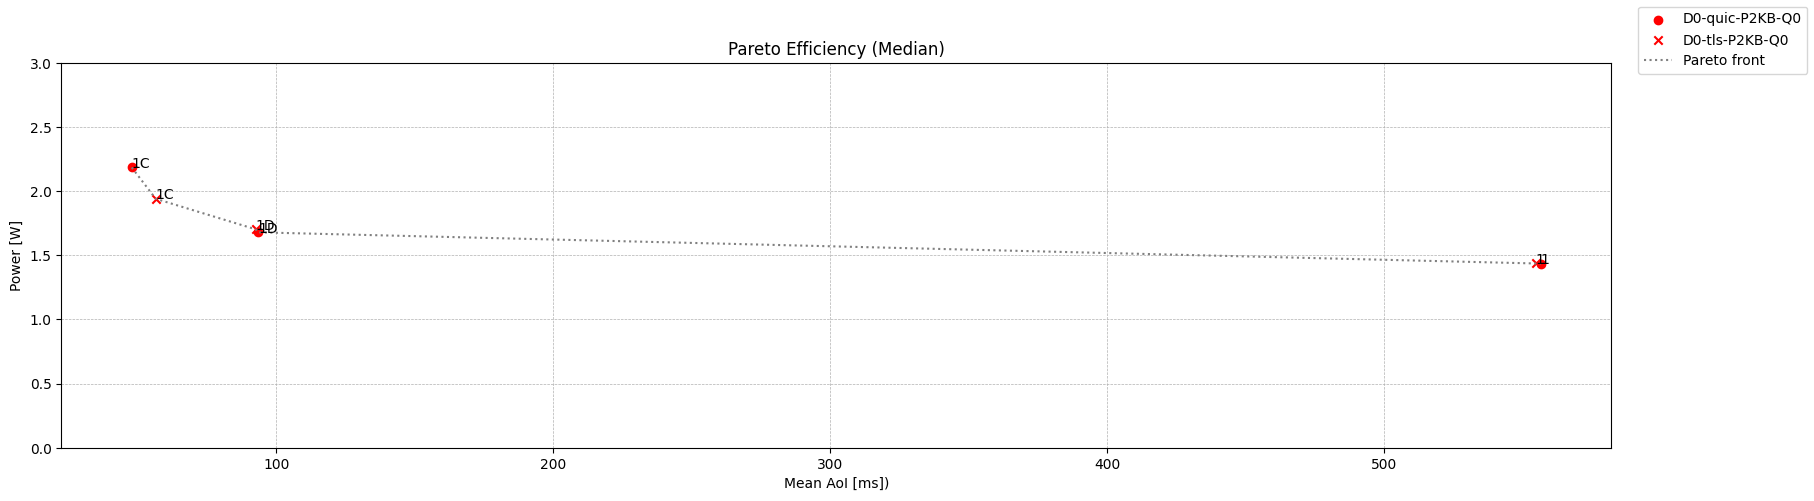

In [6]:
aoi_2KB = load_json('../../../results/aoi/aoi_2KB.json')

del_keys = []
for key in aoi_2KB.keys():
    for sub_key in aoi_2KB[key].keys():
        if 'Q0' not in sub_key:
            del_keys.append((key, sub_key))
for key, sub_key in del_keys:
    del aoi_2KB[key][sub_key]

front_2KB = plot_pareto(aoi_2KB['mean_aoi'], aoi_2KB['median_aoi'], aoi_2KB['energy'], aoi_2KB['time'], metric='median')

# Pareto front summary

In [12]:
%matplotlib qt5

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title('Pareto front (median)')

ax.plot(front_128B['aoi'], front_128B['power'], color='green', linewidth=0.75, label='128B')    
ax.plot(front_256B['aoi'], front_256B['power'], color='orange', linewidth=0.75, label='256B')
ax.plot(front_512B['aoi'], front_512B['power'], color='red',  linewidth=0.75, label='512B')
ax.plot(front_1KB['aoi'], front_1KB['power'], color='blue', linewidth=0.75,  label='1KB')
ax.plot(front_2KB['aoi'], front_2KB['power'], color='violet', linewidth=0.75, label='2KB')

queue_color = {
    'Q0': 'red', 
    'Q1': 'orange',
    'Q16': 'green',
    'Q1024': 'blue'
}

for i in range(len(front_128B['aoi'])):
    ax.text(front_128B['aoi'][i], front_128B['power'][i], convert_rate(front_128B['rate'][i]), color='black')
    ax.scatter(front_128B['aoi'][i], front_128B['power'][i],  marker='.' if 'quic' in front_128B['config'][i] else 'x', color=queue_color[front_128B['config'][i].split('-')[-1]])    

for i in range(len(front_256B['aoi'])):
    ax.text(front_256B['aoi'][i], front_256B['power'][i], convert_rate(front_256B['rate'][i]), color='black')
    ax.scatter(front_256B['aoi'][i], front_256B['power'][i], marker='.' if 'quic' in front_256B['config'][i] else 'x', color=queue_color[front_256B['config'][i].split('-')[-1]])

for i in range(len(front_512B['aoi'])):
    ax.text(front_512B['aoi'][i], front_512B['power'][i], convert_rate(front_512B['rate'][i]), color='black')
    ax.scatter(front_512B['aoi'][i], front_512B['power'][i], marker='.' if 'quic' in front_512B['config'][i] else 'x', color=queue_color[front_512B['config'][i].split('-')[-1]])

for i in range(len(front_1KB['aoi'])):
    ax.text(front_1KB['aoi'][i], front_1KB['power'][i], convert_rate(front_1KB['rate'][i]), color='black')
    ax.scatter(front_1KB['aoi'][i], front_1KB['power'][i], marker='.' if 'quic' in front_1KB['config'][i] else 'x', color=queue_color[front_1KB['config'][i].split('-')[-1]])

    
for i in range(len(front_2KB['aoi'])):
    queue = front_2KB['config'][i].split('-')[-1]
    ax.text(front_2KB['aoi'][i], front_2KB['power'][i], convert_rate(front_2KB['rate'][i]), color='black')
    ax.scatter(front_2KB['aoi'][i], front_2KB['power'][i], marker='.' if 'quic' in front_2KB['config'][i] else 'x', color=queue_color[queue])

legend_colors = ['orange', 'orange', 'green', 'green', 'blue', 'blue']
legend_labels = ['FIFO 1 Quic', 'FIFO 1 Tls', 'FIFO 16 Quic', 'FIFO 16 Tls', 'FIFO 1024 Quic', 'FIFO 1024 Tls']
markers = ['o', 'x', 'o', 'x', 'o', 'x']
legend_handles = [plt.scatter([], [], color=color, s=25, marker=marker) for color, marker in zip(legend_colors, markers)]

ax.legend(legend_handles, legend_labels)
plt.show()